In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime as dt
import numpy as np
import shutil

In [42]:
plt.rcParams.update({'figure.max_open_warning': 0})

In [43]:
path = os.getcwd()
data = os.path.join(path,'data','wltimeseries.csv')

In [44]:
begin = 1940
end = 2019
outpath='test'

## Read data and obtain key lists of parameters
## Very Important to set fixed date range so that scatter points aren't connected improperly due to data outside of range

In [45]:
def read_data(data):
    df = pd.read_csv(data)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df['wl'] = df['wl'].round()
    wells = df['well'].unique().tolist()
    df['td'] = df['rp'] - df['td']
    df['from'] = df['rp'] - df['from']
    df['to'] = df['rp'] - df['to']
    return df,wells

## Create outdirectories with jupyter magic commands, great temporary solution but terrible for long term use. TODO: script this in python or powershell

In [46]:
def make_dir():
    outdir = f"{outpath}"
    if os.path.exists(outdir):
        shutil.rmtree(outdir)
    os.makedirs(outdir)

In [47]:
def plt_hydrographs(threshold, begin, end, outpath):
    df,wells=read_data(data)
    make_dir()
    period = [dt.date(begin, 1, 1), dt.date(end, 1, 1)]
    record = pd.date_range(dt.date(begin, 1, 1), dt.date(end, 1, 1),freq='M')
    record_length = len(record)
    filt = (df.index >= str(begin)) & (df.index <= str(end))
    df = df.loc[filt]
    df_out = pd.DataFrame(columns=df.columns.tolist())
    for well in wells:
        df_well = df.loc[(df['well'] == well)]
        df_well = df_well.loc[~df_well.index.duplicated()]
        if not df_well.empty:
            if df_well['wl'].dropna().count() >= threshold:
                fig,ax=plt.subplots(1)
                line1, = ax.plot(df_well.index, df_well['wl'], c='#4472C4')
                line2, = ax.plot(record, np.repeat(df_well['rp'].mean(),record_length),c='#ED7D31')
                line3, = ax.plot(record, np.repeat(df_well['from'].mean(),record_length),c='#FFC000')
                line3, = ax.plot(record, np.repeat(df_well['to'].mean(),record_length),c='#70AD47')
                #ax.legend(loc='center left')
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
                ax.spines['left'].set_visible(False)
                ax.set_xlim(period)
                #bottom, top = ylim()
                #ax.set_ylim(0,1000)
                ax.set_ylabel('Elevation (ft amsl)')
                plt.title(f"{well}")
                ax.margins(y=.5)
                axes = plt.gca()
                axes.yaxis.grid()
                #ax.text(1, 1, "Depth: ")
                if df_well['wl'].min() < 10:
                    ax.set_ylim(0)
                fig.savefig(f"./{outpath}/{well}.png")

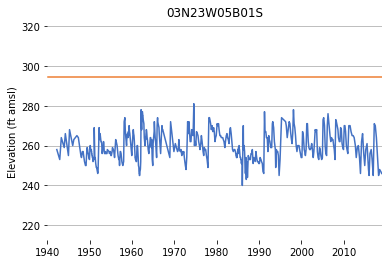

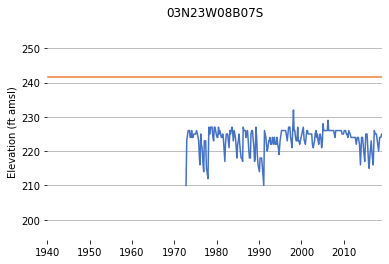

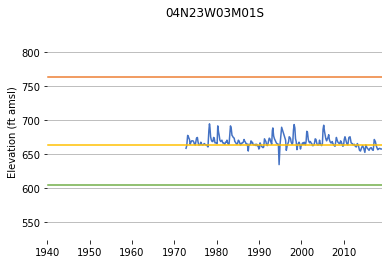

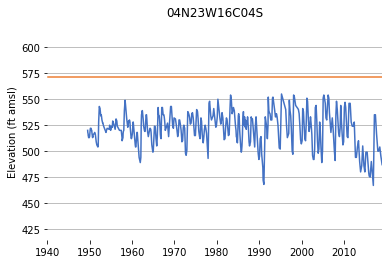

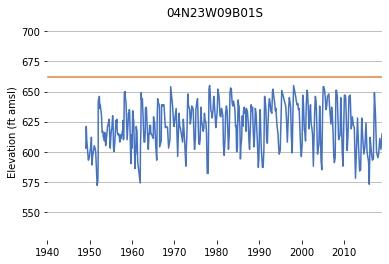

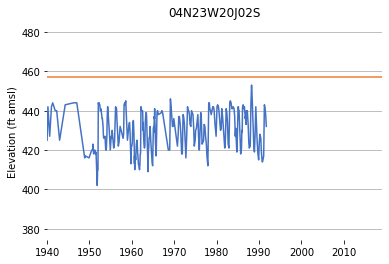

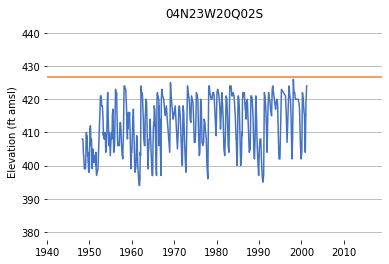

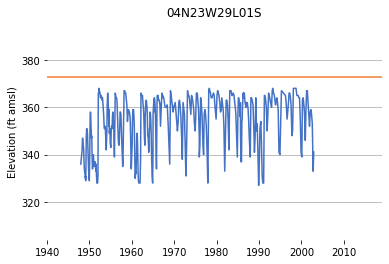

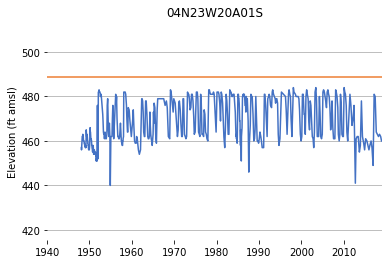

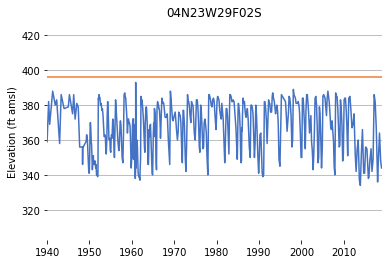

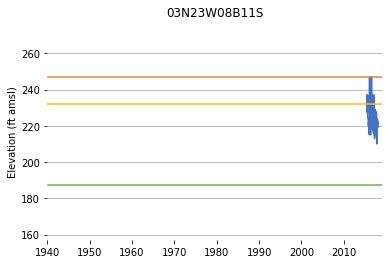

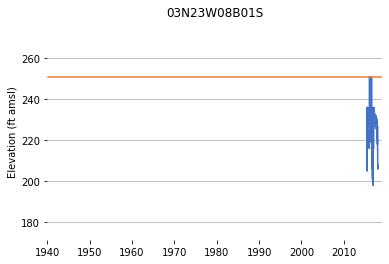

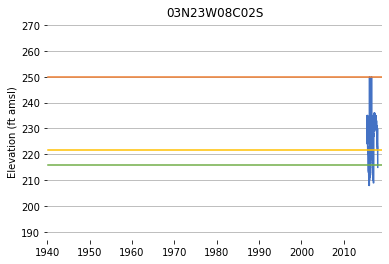

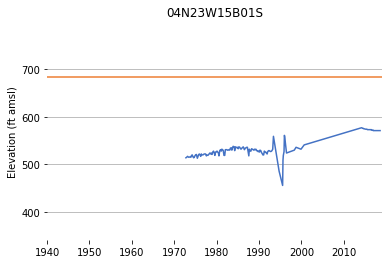

In [48]:
if __name__ == "__main__":
    plt_hydrographs(250,begin,end,outpath)